Run msed like in teh experiment.
Change the query number in second block to get a differnt query.

In [1]:
from pathlib import Path
# Load the softmax encodings of the data

from simcoder.similarity import load_mf_encodings

smData = load_mf_encodings(Path('/Volumes/Data/mf_resnet50_softmax'))

# Load the data

allData = load_mf_encodings(Path("/Volumes/Data/mf_dino2")) # load encodings

from simcoder.msedOO import l1_norm

allData = l1_norm(allData)


In [4]:
from simcoder.similarity import getDists
from simcoder.count_cats import *
from simcoder.msedOO import msed
import numpy as np

with open( "../selected_queries.txt","r" ) as f:
    queries = [int(line.strip()) for line in f ]

query = queries[0]
dists = getDists(query, allData)
closest_indices = np.argsort(dists)  # the closest images to the query
    
best_k_for_one_query = closest_indices[0:100]  # the k closest indices in data to the query
category = get_topcat(query, smData)
best_k_categorical = getBestCatsInSubset(category, best_k_for_one_query, smData)  # the closest indices in category order - most peacocky peacocks etc.
poly_query_indexes = best_k_categorical[0:6]  # These are the indices that might be chosen by a human
poly_query_data = allData[poly_query_indexes]  # the actual datapoints for the queries

base = msed(np.array(poly_query_data))
complexities = base.msed(allData)



In [5]:

complexities = complexities.flatten()   # <<< these are all matrices of matrices shouldn't be.
indices = np.argsort(complexities)      # lowest is first
top_100 = indices[0:100]


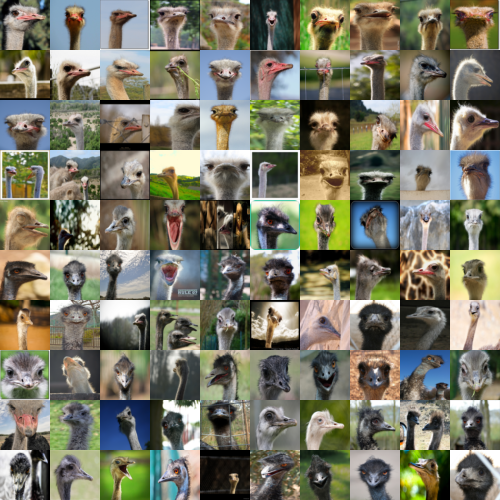

In [6]:
from simcoder.similarity import make_mf_image_grid

make_mf_image_grid(top_100,10,10,50,50)